**ASSIGNMENT 3**

Nama: Aulia Putri Hidayat

Kode Peserta: PYTN-KS14-023
***

## Import Library

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [38]:
#Membaca data file csv
df = pd.read_csv("bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [39]:
#Sample data
#melihat 5 baris pertama dari DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
#Menampilkan n record terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [41]:
#Menampilkan dataframe secara acak
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40650,37,unemployed,single,tertiary,no,1291,no,no,cellular,5,aug,150,1,97,2,success,yes
38803,30,services,single,secondary,no,0,yes,no,cellular,18,may,131,6,363,9,failure,no
35582,43,blue-collar,married,primary,no,823,yes,no,telephone,7,may,174,12,-1,0,unknown,no
25677,30,unemployed,single,tertiary,no,1622,no,no,cellular,19,nov,242,1,-1,0,unknown,no
9495,44,blue-collar,single,secondary,no,259,yes,no,unknown,6,jun,163,2,-1,0,unknown,no
3769,33,blue-collar,married,secondary,no,58,no,no,unknown,16,may,144,2,-1,0,unknown,no
35640,43,blue-collar,married,secondary,no,0,yes,no,cellular,8,may,440,1,-1,0,unknown,no
34535,29,technician,single,secondary,yes,-368,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2576,51,technician,married,secondary,no,12061,yes,no,unknown,13,may,332,1,-1,0,unknown,no
21774,42,admin.,married,secondary,no,329,no,no,cellular,19,aug,347,3,-1,0,unknown,no


In [42]:
#Dimensi dataframe (rows, columns)
#Mengetahui dimensi dari dataframe atau ukuran baris dan kolomnya
df.shape

(45211, 17)

In [43]:
#Menampilkan nama-nama kolom pada dataframe
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [44]:
#Menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Cleaning

In [45]:
#Melakukan pengecekan missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
#Melakukan pengecekan data terduplikat
df.duplicated().sum()

0

## Exploratory Data Analysis

In [48]:
#Menghitung frekuensi client subscribe dalam kolom y
Clientsubs = pd.DataFrame({"Frekuensi":df["y"].value_counts()})
Clientsubs

,Frekuensi
no,39922
yes,5289


- Kolom y memiliki 2 data jawaban tercatat sebagai data client apakah client tersebut berlangganan atau tidak. Hasil yang ditampilkan dari tabel di atas menunjukkan bahwa frekuensi client yang tidak berlangganan lebih banyak dibanding client yang berlangganan

In [49]:
#Variabel penyimpan frekuensi client subscribe
client_subscribe = Clientsubs["Frekuensi"]

## Data Visualization

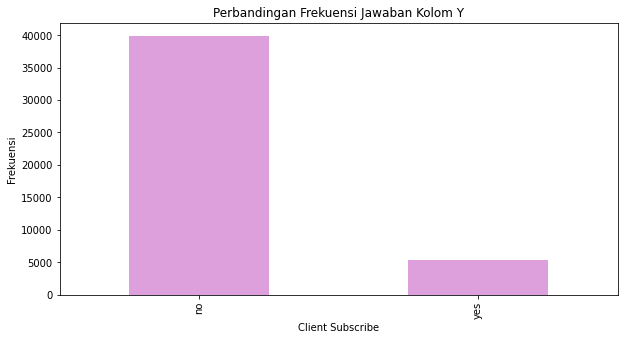

In [50]:
#Membuat bar chart
client_subscribe.plot(kind="bar",color="plum", figsize=(10,5))
plt.title("Perbandingan Frekuensi Jawaban Kolom Y")
plt.xlabel("Client Subscribe")
plt.ylabel("Frekuensi") 

plt.show()

- Dapat diliat dari grafik di atas bahwa frekuensi antara client yang berlangganan dengan yang tidak berlangganan memiliki selisih yang cukup jauh.

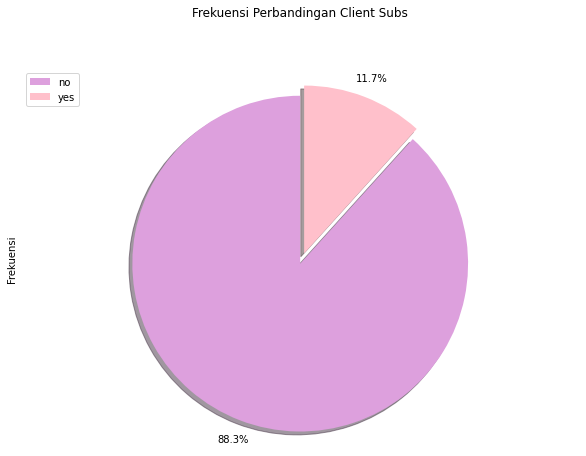

In [51]:
#Menemukan perbandingan client subscribe pada kolom y dengan gambaran pie chart
color_list = ["plum", "pink"]

explode_list = [0.015, 0.05]

client_subscribe.plot(
                                kind = "pie",
                                figsize = (10, 7),  
                                autopct = '%1.1f%%',
                                startangle = 90,
                                shadow = True,
                                labels = None,
                                colors = color_list,
                                pctdistance = 1.12,      
                                explode = explode_list
                            )

plt.title("Frekuensi Perbandingan Client Subs", y=1.12)
plt.axis("equal")

plt.legend(labels=client_subscribe.index, loc="upper left")

plt.show()

- Persentase jawaban no dan yes pada client subscribe terpaut jauh yang dimana 'yes' dengan 11,7% dan 'no' dengan 88,3%.

Text(0, 0.5, 'Frekuensi')

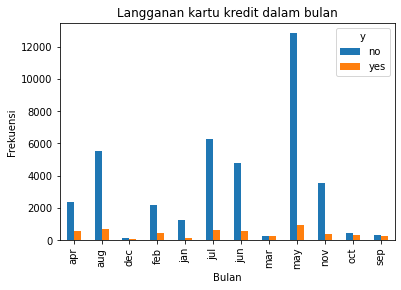

In [52]:
#Menemukan perbandingan frekuensi client subs tiap bulan dengan gambaran bar chart
pd.crosstab(df.month,df.y).plot(kind="bar")
plt.title("Langganan kartu kredit dalam bulan")
plt.xlabel("Bulan")
plt.ylabel("Frekuensi")

- Dari grafik di atas dapat dilihat bahwa kecenderungan data tiap bulannya menunjukkan pada hasil 'no' yang lebih banyak, artinya lebih banyak client yang tidak melakukan langganan dibanding yang mengambil langganan.

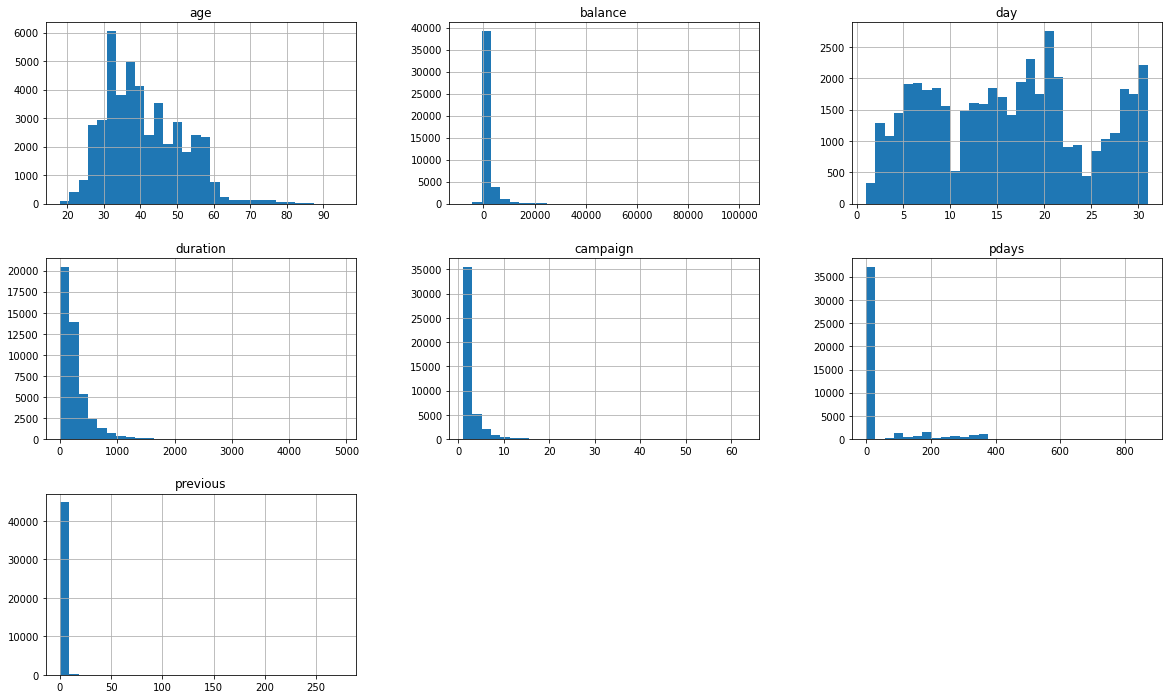

In [53]:
#Membuat histogram data-data numerik
df.hist(bins=30, figsize=(20, 12))

plt.show()

- Beberapa visualisasi yang didapat dari data-data bertipe numerik (integer)

## Prepocessing Data

### Label Encoder
##### Mengubah data type menjadi numerik untuk memudahkan proses pemodelan

In [56]:
#Menginisiasi label encoder
le = LabelEncoder()
cat_vars = ["job", "marital", "education", "default", "housing", "loan", 
            "contact", "month", "poutcome", "y"]

# Convert categorical variables usin
#Melakukan convert variabel kategori
for var in cat_vars:
    df[var] = le.fit_transform(df[var])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(2), int64(15)
memory usage: 5.5 MB


<Axes: >

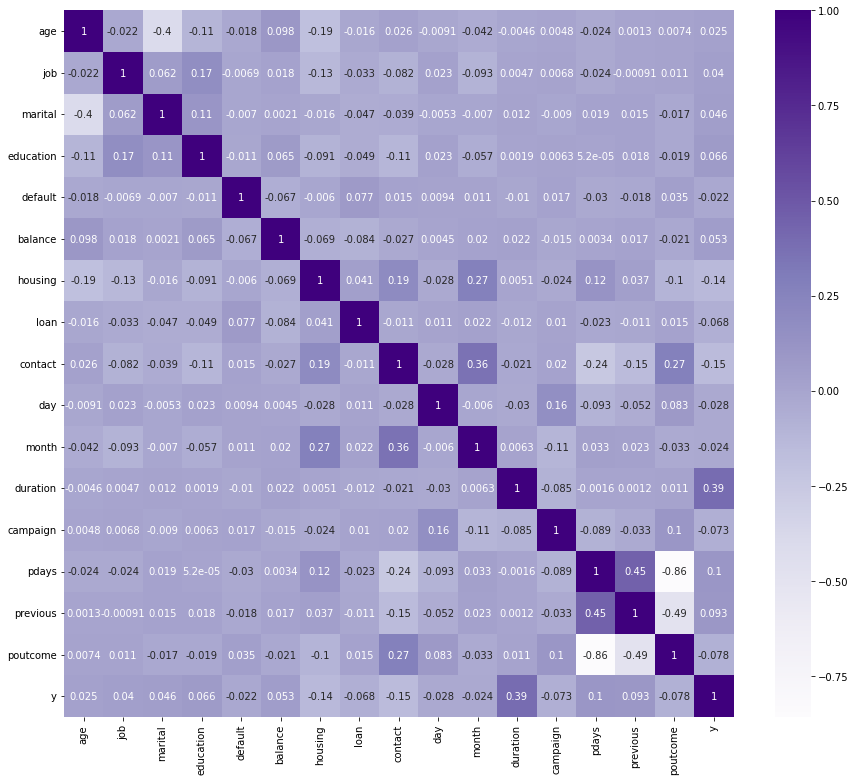

In [69]:
plt.figure(figsize=(15, 13))
sns.heatmap(df.corr(), annot=True, cmap="Purples")

### Scaler
##### Standarisasi data untuk menyeragamkan nilai data sehingga seluruh data menjadi standar

In [64]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [67]:
logReg = LogisticRegression()
logReg.fit(X_train_scaled, y_train)
y_pred_logReg = logReg.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred_logReg)
report_logreg = classification_report(y_test, y_pred_logReg)

print(report_logreg)
print(f"Accuracy Logistic Regression: {accuracy_logreg}")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy Logistic Regression: 0.8879796527700984


Confussion Matrix Logistic Regression 
 [[7793  159]
 [ 854  237]]


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

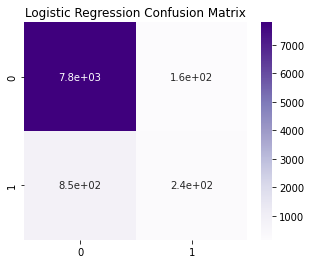

In [68]:
#Confussion Matrix
cm_logReg = confusion_matrix(y_test, y_pred_logReg)
print("Confussion Matrix Logistic Regression", "\n", cm_logReg)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logReg, annot=True, cmap="Purples")

## K-Nearest Neighbors

In [71]:
#Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

#Memprediksi respon/output
y_pred_KNN = knn.predict(X_test)

accuracy_KNN = knn.score(X_test, y_test)
report_KNN = classification_report(y_test,y_pred_KNN)

print(report_KNN)
print(f'Accuracy KNN classifier:{accuracy_KNN}')

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.17      0.26      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

Accuracy KNN classifier:0.8839986730067455


Confussion Matrix K-Nearest Neighbors 
 [[7805  147]
 [ 902  189]]


<Axes: title={'center': 'KNN Confusion Matrix'}>

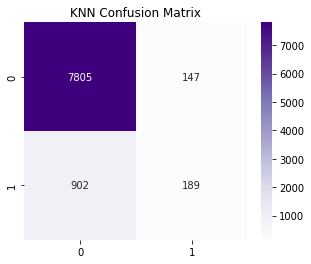

In [78]:
#Confussion Matrix KNN
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("Confussion Matrix K-Nearest Neighbors", "\n", cm_KNN)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("KNN Confusion Matrix")
sns.heatmap(cm_KNN, annot=True, cmap="Purples", fmt="g")

## Support Vector Machine (SVM)

In [73]:
#Membuat model Support Vector Machine
svm = svm.SVC()
svm.fit(X_train, y_train)

#Memprediksi respon/output
y_pred_SVM = svm.predict(X_test)

accuracy_SVM = svm.score(X_test, y_test)
report_SVM = classification_report(y_test,y_pred_SVM)

print(report_SVM)
print(f'Accuracy SVM classifier:{accuracy_SVM}')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.54      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.47      9043
weighted avg       0.84      0.88      0.82      9043

Accuracy SVM classifier:0.8794647793873714


Confussion Matrix Support Vector Machine 
 [[7946    6]
 [1084    7]]


<Axes: title={'center': 'SVM Confusion Matrix'}>

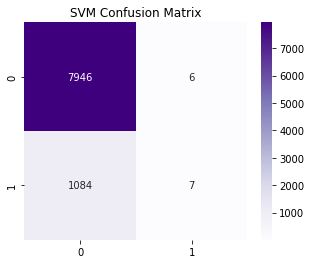

In [77]:
#Confussion Matrix KNN
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confussion Matrix Support Vector Machine", "\n", cm_SVM)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("SVM Confusion Matrix")
sns.heatmap(cm_SVM, annot=True, cmap="Purples", fmt="g")

## Decision Tree

In [75]:
#Membuat model Decision Tree
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtc = dtc.fit(X_train,y_train)

#Memprediksi respon/output
y_pred_DTC = dtc.predict(X_test)

accuracy_DTC = accuracy_score(y_test,y_pred_DTC)
report_DTC = classification_report(y_test,y_pred_DTC)

print(report_DTC)
print(f"Accuracy Decision Tree: {accuracy_DTC}")

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.55      0.23      0.33      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.88      0.86      9043

Accuracy Decision Tree: 0.8848833351763795


Confussion Matrix Decision Tree 
 [[7749  203]
 [ 838  253]]


<Axes: title={'center': 'Decision Tree Confusion Matrix'}>

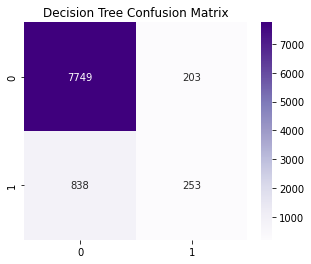

In [76]:
#Confusion Matrix Decision Tree
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Confussion Matrix Decision Tree", "\n", cm_DTC)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("Decision Tree Confusion Matrix")
sns.heatmap(cm_DTC, annot=True, cmap="Purples", fmt="g")

## Random Forest

In [79]:
#Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

#Memprediksi respon/output
y_pred_RFC = rfc.predict(X_test)

accuracy_RFC = accuracy_score(y_test,y_pred_RFC)
report_RFC = classification_report(y_test,y_pred_RFC)

print(report_RFC)
print(f"Accuracy Random Forest: {accuracy_RFC}")

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy Random Forest: 0.9011390025434037


Confussion Matrix Decision Tree 
 [[7702  250]
 [ 644  447]]


<Axes: title={'center': 'Random Forest Confusion Matrix'}>

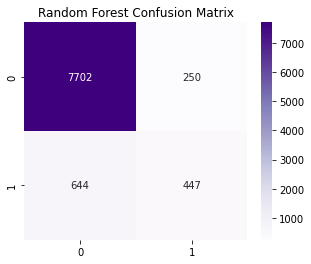

In [80]:
#Confusion Matrix Random Forest
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Confussion Matrix Decision Tree", "\n", cm_RFC)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("Random Forest Confusion Matrix")
sns.heatmap(cm_RFC, annot=True, cmap="Purples", fmt="g")

## Naive Bayes

In [81]:
#Membuat model Naive Bayes dengan Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Memprediksi respon/output
y_pred_GNB = gnb.predict(X_test)

accuracy_GNB = accuracy_score(y_test,y_pred_GNB)
report_GNB = classification_report(y_test,y_pred_GNB)

print(report_GNB)
print(f"Accuracy of Naive Bayes: {accuracy_GNB}")

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7952
           1       0.34      0.46      0.39      1091

    accuracy                           0.83      9043
   macro avg       0.63      0.67      0.65      9043
weighted avg       0.85      0.83      0.84      9043

Accuracy of Naive Bayes: 0.8289284529470309


Confussion Matrix Naive Bayes 
 [[6993  959]
 [ 588  503]]


<Axes: title={'center': 'Naive Bayes Confusion Matrix'}>

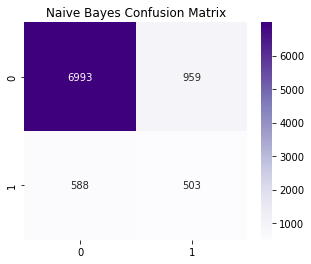

In [82]:
#Confusion Matrix Naive Bayes
cm_naivebayes = confusion_matrix(y_test, y_pred_GNB)
print("Confussion Matrix Naive Bayes", "\n", cm_naivebayes)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_naivebayes, annot=True, cmap="Purples", fmt="g")

## Analysis

In [84]:
print("Accuracy of Logistic Regression : {:.2f}".format(logReg.score(X_test, y_test)))
print("Accuracy of KNN : {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy of Decision Tree : {:.2f}".format(dtc.score(X_test, y_test)))
print("Accuracy of Random Forest : {:.2f}".format(rfc.score(X_test, y_test)))
print("Accuracy of Naive Bayes : {:.2f}".format(gnb.score(X_test, y_test)))
print("Accuracy of SVM : {:.2f}".format(svm.score(X_test, y_test)))

c:\Users\Aulia Putri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy of Logistic Regression : 0.12
Accuracy of KNN : 0.88
Accuracy of Decision Tree : 0.88
Accuracy of Random Forest : 0.90
Accuracy of Naive Bayes : 0.83
Accuracy of SVM : 0.88


Dari beberapa pemodelan yang telah dilakukan, diperoleh kesimpulan berikut:
- Dari data hasil analisa diatas didapatkan 2 algoritma dengan akurasi tertinggi yaitu Decision Tree dan Random Forest, dikarenakan untuk memprediksi data berupa nasabah bank dibutuhkan akurasi tinggi maka 2 algoritma tersebut sangat cocok untuk digunakan dalam data terkait